In [1]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt
from common import set_figure

### Mess with the diagonal

In [3]:
n = 100
d = np.linspace(0,1,n)
d[0] = 1/10000
d[1] = d[0] * 10
A = sparse.diags(d, 0, shape=(n,n), format='csr')
b = np.zeros((n,))

In [5]:
lambdamin, v = sla.eigs(A, 1, which='SM', maxiter=10000)
lambdamax, v = sla.eigs(A, 1, which='LM', maxiter=10000)
print(lambdamin, lambdamax)
print((lambdamax - lambdamin) / (lambdamax + lambdamin))

[0.0001+0.j] [1.+0.j]
[0.99980002+0.j]


In [6]:
err = []
res = []
alpha = 2 / (lambdamin.real + lambdamax.real)
print(alpha)
#alpha = 0.45
x = np.random.rand(n)
for i in range(1000):
    x = x + alpha * (b - A*x)
    err.append(np.linalg.norm(x))
    res.append(np.linalg.norm(b-A*x))

[1.99980002]


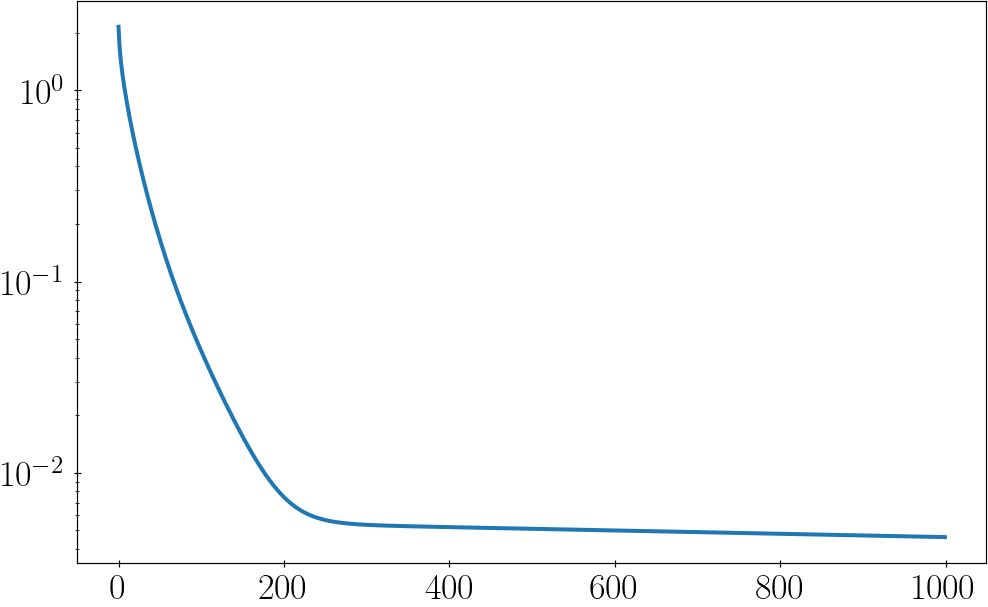

In [7]:
plt.semilogy(res)

In [ ]:
print((lambdamin.real - lambdamax.real)/(lambdamin.real + lambdamax.real))

In [8]:
err = np.array(err)
err[1:] / err[:-1]

array([0.78747148, 0.85954918, 0.89361179, 0.91287977, 0.92519737,
       0.93380401, 0.94025082, 0.9453571 , 0.94958489, 0.95320767,
       0.95639402, 0.9592517 , 0.96185204, 0.96424374, 0.96646105,
       0.96852871, 0.97046501, 0.97228375, 0.97399563, 0.97560905,
       0.97713081, 0.97856653, 0.97992099, 0.98119836, 0.98240236,
       0.98353642, 0.98460374, 0.98560736, 0.98655021, 0.98743515,
       0.98826493, 0.98904229, 0.98976986, 0.99045026, 0.99108601,
       0.99167958, 0.99223335, 0.99274966, 0.99323073, 0.9936787 ,
       0.99409564, 0.99448352, 0.9948442 , 0.99517947, 0.99549103,
       0.99578046, 0.99604928, 0.99629891, 0.99653068, 0.99674584,
       0.99694557, 0.99713097, 0.99730307, 0.99746282, 0.99761111,
       0.99774879, 0.99787661, 0.99799531, 0.99810555, 0.99820796,
       0.9983031 , 0.99839151, 0.99847369, 0.9985501 , 0.99862116,
       0.99868726, 0.99874878, 0.99880604, 0.99885936, 0.99890903,
       0.99895532, 0.99899846, 0.9990387 , 0.99907624, 0.99911